## Neural Network Classifier

In [47]:
# Import the necessary libraries
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix, precision_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform

In [48]:
# Disables Python warnings
warnings.filterwarnings('ignore')

In [49]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df

,orderid,Customer Name,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,preparationtime,orderdate,shipdate
0,2,Ruben Dartt,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,4,2014-09-05,2014-09-09
1,4,Liz Pelletier,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,1,2016-05-30,2016-05-31
2,5,Liz Pelletier,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,7,2013-12-31,2014-01-07
3,6,Liz Pelletier,First Class,359.058,3,0.30,-35.9058,Home Office,Central,Illinois,Bookcases ...,Furniture,3,2014-03-24,2014-03-27
4,9,Sample Company A,Standard Class,290.666,2,0.15,27.3568,Corporate,West,California,Bookcases ...,Furniture,4,2013-05-26,2013-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,9988,Theresa Swint,Standard Class,470.376,3,0.20,52.9173,Consumer,West,California,Phones ...,Technology,4,2016-07-14,2016-07-18
7691,9990,Max Jones,First Class,1097.544,7,0.20,123.4737,Corporate,Central,Texas,Phones ...,Technology,2,2015-12-09,2015-12-11
7692,9992,Kristina Nunn,Standard Class,235.188,2,0.40,-43.1178,Corporate,East,Ohio,Phones ...,Technology,5,2014-01-12,2014-01-17
7693,9993,Sean Miller,First Class,391.980,2,0.00,113.6742,Consumer,East,Delaware,Phones ...,Technology,2,2016-09-22,2016-09-24


In [50]:
# Selects the features that will be used in the model
X = df[['shipmode', 'segment', 'quantity', 'sales', 'profit', 'discount', 'preparationtime']]

# Converts Categorical data into indicator values (Boolean in this case)
X = pd.get_dummies(X, columns=['shipmode', 'segment'])

In [51]:
# Encodes the values in the column 'category' as numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['category'].values

array([0, 0, 0, ..., 2, 2, 2])

In [52]:
# Selects the encoded values in 'category' as the target variables that ill be used in the model
y = df['category']

In [53]:
# Splits the features and variables into training and testing data
# 25% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [54]:
# Standerises the feature data in the dataset
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [55]:
# Initialises the Neural Network Classifier and trains it
model = MLPClassifier(max_iter=900, random_state=0)
model.fit(X_train_scaled,y_train)

MLPClassifier(max_iter=900, random_state=0)

In [56]:
# Makes predictions using the test and training data
y_test_pred_NNet = model.predict(X_test_scaled)
y_train_pred_NNet = model.predict(X_train_scaled)

In [57]:
# Calculates the training score, test score, and accuracy score rounding them to 3 significant figures
train_score_NNet = model.score(X_train_scaled,y_train)
test_score_NNet = model.score(X_test_scaled,y_test)
accuracy_NNet = accuracy_score(y_test,y_test_pred_NNet)

print('Neueal Network Classifier Evaluation:\n')
print('Training Score is: {:.3f}'.format(train_score_NNet))
print('Test Score is: {:.3f}'.format(test_score_NNet))
print('Accuracy Score: {:.3f}'.format(accuracy_NNet))

Neueal Network Classifier Evaluation:

Training Score is: 0.749
Test Score is: 0.719
Accuracy Score: 0.719


Multilabel Confusion Matrix

In [58]:
# Creates a Confusion and a Multilabel Confusion Matrix comparing the test predictions to the original
mcm = multilabel_confusion_matrix(y_test, y_test_pred_NNet)

tn = mcm[:, 0, 0] # True Negative
tp = mcm[:, 1, 1] # True Positive
fn = mcm[:, 1, 0] # False Negative
fp = mcm[:, 0, 1] # False Positive

In [59]:
# Prints out the Confusion and Multilabel Confusion Matrix
print("Multilabel Confusion Matrix:\n", mcm)

Multilabel Confusion Matrix:
 [[[1427  106]
  [ 234  157]]

 [[ 413  307]
  [  89 1115]]

 [[1467  128]
  [ 218  111]]]


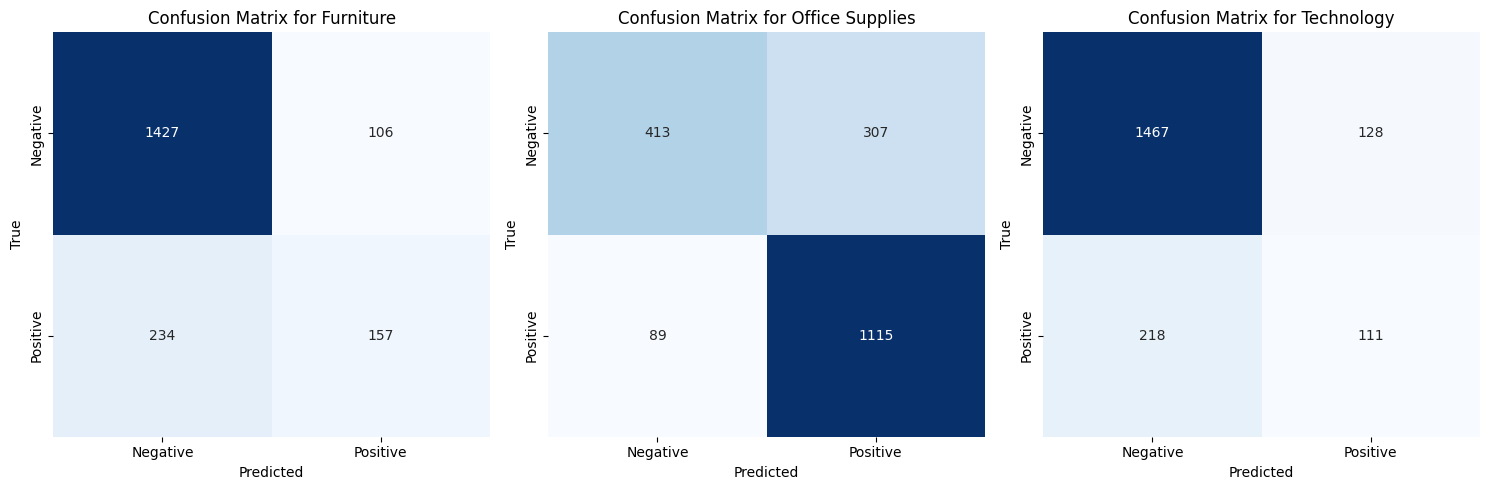

In [60]:
# Plots the multilabel confusion matrix
num_classes = len(le.classes_)
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i, (ax, label) in enumerate(zip(axes.flatten(), le.classes_)):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout()
plt.show()

In [61]:
# Calculates the true positive rate, true negative rate, F1 score, and precision
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred_NNet, average=None)
precision = precision_score(y_test, y_test_pred_NNet, average='macro')

print("True Positive Rate is: ", tp_rate)
print("True Negative Rate is: ", tn_rate)
print("F1 Score is:           ", f1)
print("Precision Score is:    ", precision)

True Positive Rate is:  [0.40153453 0.92607973 0.33738602]
True Negative Rate is:  [0.93085453 0.57361111 0.91974922]
F1 Score is:            [0.48012232 0.8492003  0.39084507]
Precision Score is:     0.6151667376834287


In [62]:
# Creates a Confusion and a Multilabel Confusion Matrix comparing the training predictions to the original
mcm = multilabel_confusion_matrix(y_train, y_train_pred_NNet)

tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [63]:
# Prints out the Confusion and Multilabel Confusion Matrix
print("Multilabel Confusion Matrix:\n", mcm)

Multilabel Confusion Matrix:
 [[[4335  249]
  [ 627  560]]

 [[1291  906]
  [ 276 3298]]

 [[4466  295]
  [ 547  463]]]


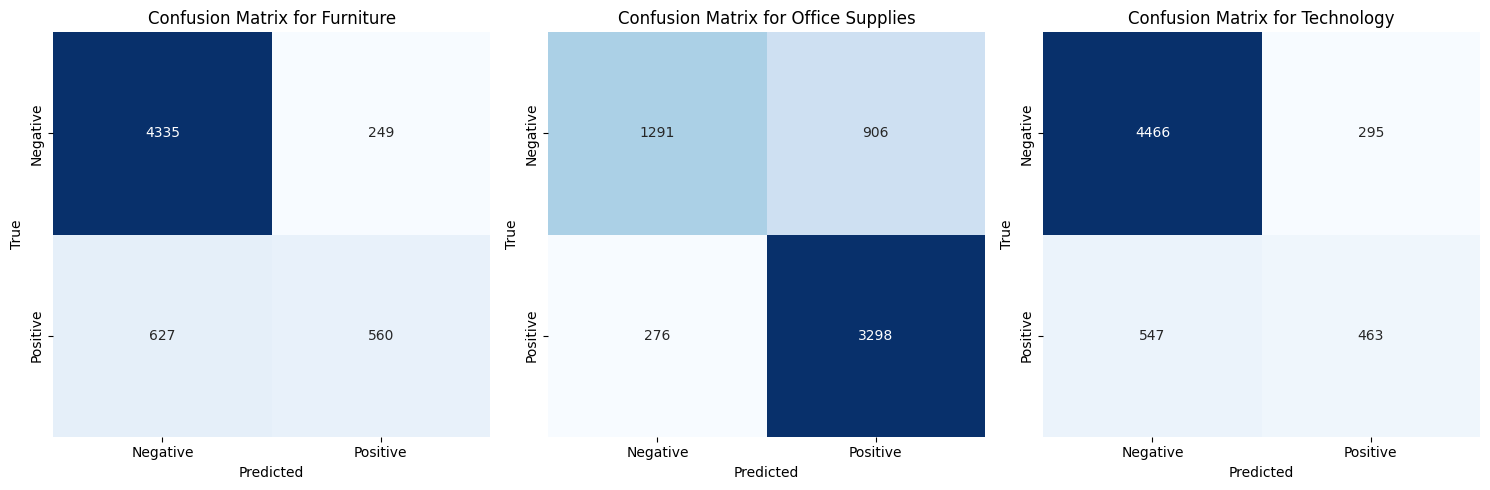

In [64]:
# Plots the multilabel confusion matrix
num_classes = len(le.classes_)
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i, (ax, label) in enumerate(zip(axes.flatten(), le.classes_)):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout()
plt.show()

In [65]:
# Calculates the true positive rate, true negative rate, F1 score, and precision
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = f1_score(y_train, y_train_pred_NNet, average=None)
precision = precision_score(y_train, y_train_pred_NNet, average='macro')

print("True Positive Rate is: ", tp_rate)
print("True Negative Rate is: ", tn_rate)
print("F1 Score is:           ", f1)
print("Precision Score is:    ", precision)

True Positive Rate is:  [0.47177759 0.9227756  0.45841584]
True Negative Rate is:  [0.94568063 0.58761948 0.93803823]
F1 Score is:            [0.56112224 0.84803291 0.52375566]
Precision Score is:     0.6958405037000869


Model Tuning (Grid Search)

In [66]:
# Sets up the GridSearchCV, defines the parameter grid, and trains it
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPClassifier(max_iter=100)

grid_search_NNet = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_NNet.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=1)

In [67]:
# Prints out the best hyperparameters, it makes predictions using the model and evaluates it
best_params = grid_search_NNet.best_params_
best_model = grid_search_NNet.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best) 

print(f"Best Hyperparameters: {best_params}")
print('Accuracy Score: {:.3f}'.format(accuracy))

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant'}
Accuracy Score: 0.741


Model Tuning (Randomized Search)

In [68]:
# Sets up the RandomizedSearchCV, defines the parameter distribution, and trains it
param_dist = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': uniform(0.0001, 0.05)
}

mlp = MLPClassifier(max_iter=100)

randomized_search_NNet = RandomizedSearchCV(mlp, param_dist, cv=5, n_iter=10, n_jobs=-1, verbose=1, random_state=0)
randomized_search_NNet.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026DD89DF590>,
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive']},
                   random_state=0, verbose=1)

In [69]:
# Prints out the best hyperparameters, it makes predictions using the model and evaluates it
best_params = randomized_search_NNet.best_params_
best_model = randomized_search_NNet.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best) 

print(f"Best Hyperparameters: {best_params}")
print('Accuracy Score: {:.3f}'.format(accuracy))

Best Hyperparameters: {'activation': 'tanh', 'alpha': np.float64(0.027344159149844845), 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive'}
Accuracy Score: 0.746
